In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff 
from plotly.colors import n_colors
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from pywaffle import Waffle
import warnings

In [2]:
df = pd.read_csv("country_vaccinations.csv")

In [3]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred"
,'daily_vaccinations_per_million'].max().reset_index()

C:\Users\admin\AppData\Local\Temp/ipykernel_3096/1657705850.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### What is the proportion of Top 10 Vaccine in the race of fighting Covid19?

In [4]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

Oxford/AstraZeneca                                                         20
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech              17
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                               15
Oxford/AstraZeneca, Pfizer/BioNTech                                        11
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech      8
Johnson&Johnson, Oxford/AstraZeneca, Sinopharm/Beijing                      7
Pfizer/BioNTech                                                             7
Moderna, Pfizer/BioNTech                                                    6
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing     5
Oxford/AstraZeneca, Sinopharm/Beijing                                       5
Name: vaccines, dtype: int64

C:\Users\admin\AppData\Local\Temp/ipykernel_3096/1362760788.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



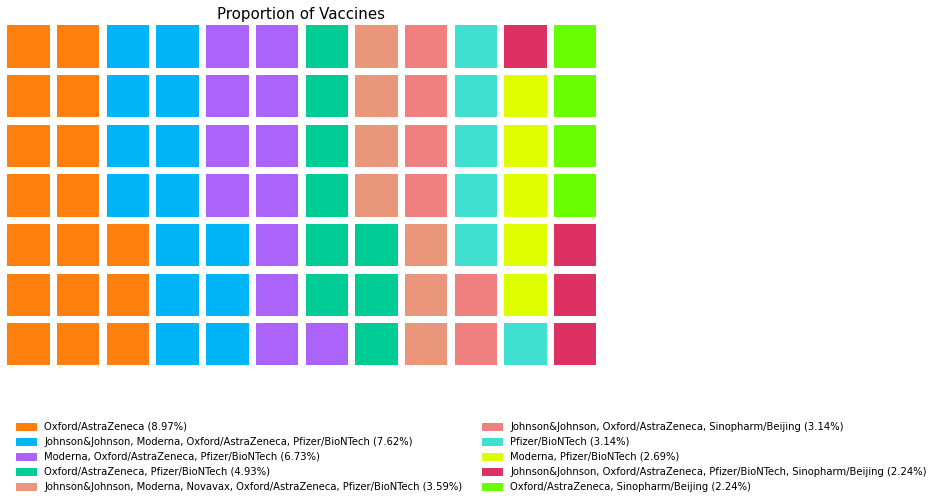

In [5]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)                                  #dict(new_df['vaccines'].value_counts(normalize = True) * 100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 
fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

### What is the number of total vaccinations & daily vaccinations according to countries?

In [6]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
fig.show()

In [7]:
data = new_df[['country','daily_vaccinations']].nlargest(25,'daily_vaccinations')
fig = px.bar(data, x = 'country',y = 'daily_vaccinations',title="Number of daily vaccinations according to countries")
fig.show()

### Which vaccine is used by which Country?

In [8]:
vacc = new_df["vaccines"].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f"Vaccine: {i}nUsed countries: {c}")

Vaccine: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/BeijingnUsed countries: ['Afghanistan', 'Belize', 'Cameroon', 'Namibia', 'Trinidad and Tobago']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik VnUsed countries: ['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']
Vaccine: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik VnUsed countries: ['Algeria', 'Zimbabwe']
Vaccine: Moderna, Oxford/AstraZeneca, Pfizer/BioNTechnUsed countries: ['Andorra', 'Australia', 'England', 'Fiji', 'Finland', 'Guernsey', 'Isle of Man', 'Japan', 'Jersey', 'Northern Ireland', 'Scotland', 'Sint Maarten (Dutch part)', 'Sweden', 'United Kingdom', 'Wales']
Vaccine: Oxford/AstraZenecanUsed countries: ['Angola', 'Democratic Republic of Congo', 'Falkland Islands', 'Kiribati', 'Liberia', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 'Togo

In [9]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

### Which Vaccine is Used the most?

In [10]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.nlargest(5,"Number of Country")

,Vaccines,Number of Country
0,Oxford/AstraZeneca,20
1,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",17
2,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",15
3,"Oxford/AstraZeneca, Pfizer/BioNTech",11
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",8


### Total Vaccinations per country grouped by Vaccines:

In [11]:
fig = px.sunburst(
    new_df,
    path=['vaccines', 'country'],
    values='total_vaccinations',
)
fig.update_layout(
    margin = dict(t=25, l=25, r=25, b=25)
)
fig.show()

In [12]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['total_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Total Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Total Vaccinations per Country')
fig = dict(data = data,layout = layout)
iplot(fig)

### Daily Vaccinations per Countries:

In [13]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['daily_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Daily Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Daily Vaccinations per Countries')
fig = dict(data = data,layout = layout)
iplot(fig)

### Relation between Total Vaccinations and Total Vaccinations per Hundred:

In [14]:
fig = px.scatter(new_df,x = 'total_vaccinations',y='total_vaccinations_per_hundred',
                 size='total_vaccinations',
                 hover_name = 'country',size_max = 30,
                 title="Total vs Total vaccinations per hundred grouped by Vaccines",
                color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

### What is the trend of total vaccinations according to countries?

In [15]:
country = ['Argentina', 'Austria', 'Belgium', 'Brazil','Canada','China','Czechia',
           'Denmark', 'England','Finland', 'France','Germany','India','Ireland', 
           'Israel', 'Italy', 'Kuwait','Mexico', 'Netherlands','Norway', 'Poland',
           'Russia','Saudi Arabia', 'Scotland','Singapore','Spain', 'Sweden',
           'Switzerland', 'Turkey','United Arab Emirates', 'United Kingdom', 'United States']
plot_trend(df,'total_vaccinations','Trend of total vaccination',country)

NameError: name 'plot_trend' is not defined